In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
chemin_fichier_nc = 'era 5/w10m 2022.nc'

ds = xr.open_dataset(chemin_fichier_nc)

wind_era5_2022 = ds.to_dataframe()
wind_era5_2022 = wind_era5_2022.reset_index()
wind_era5_2022 = wind_era5_2022[(wind_era5_2022['latitude'] == -17)&(wind_era5_2022['longitude'] == -150)]
wind_era5_2022 = wind_era5_2022.rename(columns={'time': 'DateTime'})
wind_era5_day_2022 = wind_era5_2022.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
wind_era5_day_2022 = wind_era5_day_2022[['DateTime', 'u10','v10']]
wind_era5_day_2022 = wind_era5_day_2022.reset_index().drop(columns='index')
wind_era5_day_2022

,DateTime,u10,v10
0,2022-01-01,-6.262851,-0.798775
1,2022-01-02,-4.528689,-1.326154
2,2022-01-03,-5.692352,-3.804921
3,2022-01-04,-1.522769,-2.443064
4,2022-01-05,0.266611,-0.538256
...,...,...,...
360,2022-12-27,-4.360160,0.268494
361,2022-12-28,-5.117347,0.429497
362,2022-12-29,-4.939731,0.965536
363,2022-12-30,-4.954273,-0.183355


Text(0, 0.5, 'Vent [m/s]')

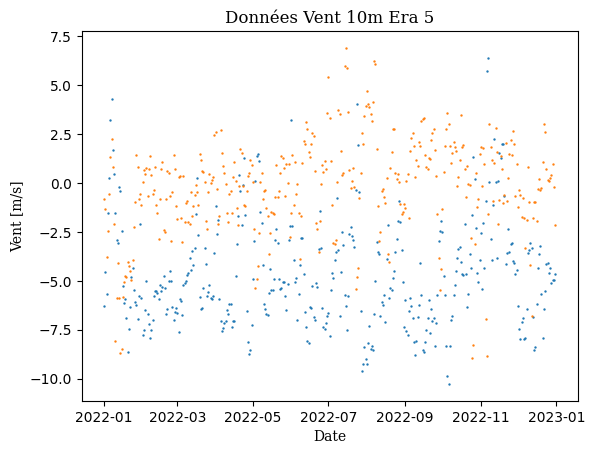

In [4]:
plt.scatter(wind_era5_day_2022['DateTime'], wind_era5_day_2022['u10'], s=.5)
plt.scatter(wind_era5_day_2022['DateTime'], wind_era5_day_2022['v10'], s=.5)
plt.title('Données Vent 10m Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
plt.ylabel('Vent [m/s]', fontfamily = 'serif')

In [5]:
chemin_fichier_nc = 'era 5/spectral 2022.nc'

ds = xr.open_dataset(chemin_fichier_nc)

spectral_era5_2022 = ds.to_dataframe()
spectral_era5_2022 = spectral_era5_2022.reset_index()
spectral_era5_2022 = spectral_era5_2022[(spectral_era5_2022['latitude'] == -17)&(spectral_era5_2022['longitude'] == -150)]
spectral_era5_2022 = spectral_era5_2022.rename(columns={'time': 'DateTime'})
spectral_era5_day_2022 = spectral_era5_2022.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
spectral_era5_day_2022 = spectral_era5_day_2022[['DateTime', 'dwps','wsk','wsp','wss']]
spectral_era5_day_2022 = spectral_era5_day_2022.reset_index().drop(columns='index')
spectral_era5_day_2022

,DateTime,dwps,wsk,wsp,wss
0,2022-01-01,0.732132,0.003713,7.326516,0.009423
1,2022-01-02,0.694004,0.004048,6.706874,0.010357
2,2022-01-03,0.936270,0.012429,3.549921,0.019064
3,2022-01-04,1.040205,0.001570,4.228412,0.008498
4,2022-01-05,0.865597,0.001774,5.281085,0.007888
...,...,...,...,...,...
360,2022-12-27,0.779376,0.001790,3.225862,0.009643
361,2022-12-28,0.595958,0.001230,3.736440,0.007507
362,2022-12-29,0.764665,0.001361,4.322400,0.008600
363,2022-12-30,0.871431,0.001721,4.707213,0.009150


Text(0.5, 0, 'Date')

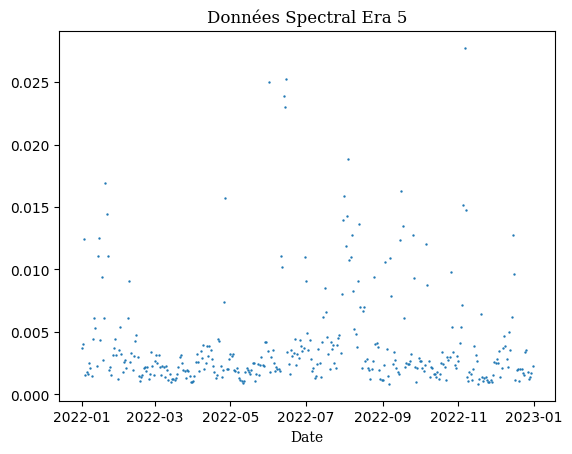

In [6]:
#plt.scatter(spectral_era5_day_2022['DateTime'], spectral_era5_day_2022['dwps'], s=.5)
plt.scatter(spectral_era5_day_2022['DateTime'], spectral_era5_day_2022['wsk'], s=.5) #measure of the deviation from normality a positive kurtosis (typical range 0.0 to 0.06) means more frequent occurrences of very extreme values relative to a normal distribution.
#plt.scatter(spectral_era5_day_2022['DateTime'], spectral_era5_day_2022['wsp'], s=.5)
#plt.scatter(spectral_era5_day_2022['DateTime'], spectral_era5_day_2022['wss'], s=.5) #measure of the asymmetry of the probability density function of the sea surface elevation. So, a positive/negative skewness (typical range -0.2 to 0.12) means more frequent occurrences of extreme values above/below the mean, relative to a normal distribution.
plt.title('Données Spectral Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
#plt.ylabel('Vent [m/s]', fontfamily = 'serif')

In [7]:
chemin_fichier_nc = 'era 5/energy 1987.nc'

ds = xr.open_dataset(chemin_fichier_nc)

energy_era5_1987 = ds.to_dataframe()
energy_era5_1987 = energy_era5_1987.reset_index()
energy_era5_1987 = energy_era5_1987[(energy_era5_1987['latitude'] == -17)&(energy_era5_1987['longitude'] == -150)]
energy_era5_1987 = energy_era5_1987.rename(columns={'time': 'DateTime'})
energy_era5_day_1987 = energy_era5_1987.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
energy_era5_day_1987 = energy_era5_day_1987[['DateTime', 'phioc']]
energy_era5_day_1987 = energy_era5_day_1987.reset_index().drop(columns='index')
energy_era5_day_1987

,DateTime,phioc
0,1987-01-01,-3.462695
1,1987-01-02,-3.327967
2,1987-01-03,-2.865134
3,1987-01-04,-2.633520
4,1987-01-05,-4.807801
...,...,...
360,1987-12-27,-17.098217
361,1987-12-28,-14.323997
362,1987-12-29,-18.009616
363,1987-12-30,-3.814773


Text(0, 0.5, 'Energy [no unit]')

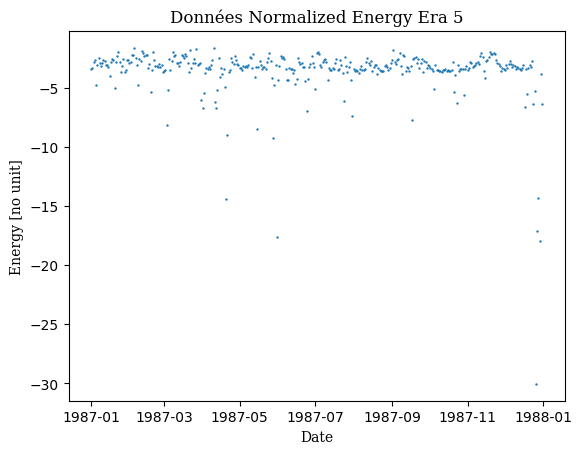

In [8]:
plt.scatter(energy_era5_day_1987['DateTime'], energy_era5_day_1987['phioc'], s=.5)
plt.title('Données Normalized Energy Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
plt.ylabel('Energy [no unit]', fontfamily = 'serif')

In [9]:
energy_era5_day_1987_2023 = energy_era5_day_1987
for i in range(1988,2024) :
    chemin_fichier_nc = 'era 5/energy '+str(i)+'.nc'

    ds = xr.open_dataset(chemin_fichier_nc)

    energy_era5 = ds.to_dataframe()
    energy_era5 = energy_era5.reset_index()
    energy_era5 = energy_era5[(energy_era5['latitude'] == -17)&(energy_era5['longitude'] == -150)]
    energy_era5 = energy_era5.rename(columns={'time': 'DateTime'})
    energy_era5_day = energy_era5.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
    energy_era5_day = energy_era5_day[['DateTime', 'phioc']]
    energy_era5_day = energy_era5_day.reset_index().drop(columns='index')
    energy_era5_day_1987_2023 = pd.concat([energy_era5_day_1987_2023, energy_era5_day], axis = 0)
energy_era5_day_1987_2023 = energy_era5_day_1987_2023[['DateTime', 'phioc']]
energy_era5_day_1987_2023 = energy_era5_day_1987_2023.reset_index().drop(columns='index')
energy_era5_day_1987_2023

,DateTime,phioc
0,1987-01-01,-3.462695
1,1987-01-02,-3.327967
2,1987-01-03,-2.865134
3,1987-01-04,-2.633520
4,1987-01-05,-4.807801
...,...,...
13509,2023-12-27,-8.866323
13510,2023-12-28,-6.629511
13511,2023-12-29,-5.206176
13512,2023-12-30,-2.588078


Text(0, 0.5, 'Température [°C]')

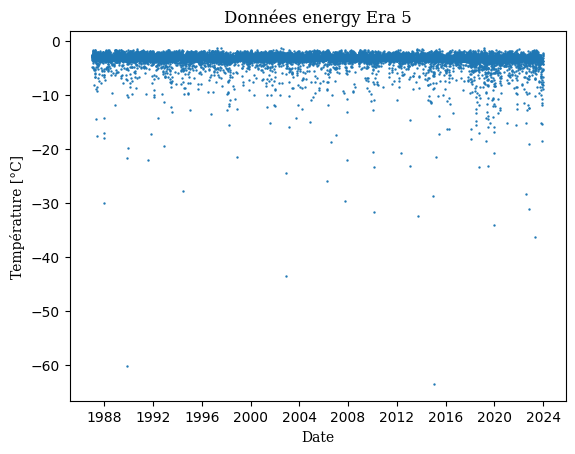

In [10]:
plt.scatter(energy_era5_day_1987_2023['DateTime'], energy_era5_day_1987_2023['phioc'], s=.5)
plt.title('Données energy Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
plt.ylabel('Température [°C]', fontfamily = 'serif')

In [11]:
energy_era5_day_1987_2023.to_csv('Tableaux finaux variables/fill_energy_phioc.csv', index = False)

**Calcul de l'énergie pour comparer à celle donnée**

In [12]:
chemin_fichier_nc = 'era 5/energy calcul 1987.nc'

ds = xr.open_dataset(chemin_fichier_nc)
calcul_energy_era5_1987 = ds.to_dataframe()
calcul_energy_era5_1987 = calcul_energy_era5_1987.reset_index()
calcul_energy_era5_1987 = calcul_energy_era5_1987[(calcul_energy_era5_1987['latitude'] == -17)&(calcul_energy_era5_1987['longitude'] == -150)]
calcul_energy_era5_1987 = calcul_energy_era5_1987.rename(columns={'time': 'DateTime'})
calcul_energy_era5_1987 = calcul_energy_era5_1987.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
calcul_energy_era5_1987 = calcul_energy_era5_1987[['DateTime', 'mpts','mpww','swh','shts']]
calcul_energy_era5_1987 = calcul_energy_era5_1987.reset_index().drop(columns='index')
calcul_energy_era5_1987

,DateTime,mpts,mpww,swh,shts
0,1987-01-01,10.049086,3.661537,2.039976,1.875391
1,1987-01-02,9.565148,2.797644,1.783836,1.711888
2,1987-01-03,9.660305,2.398048,1.772235,1.751275
3,1987-01-04,9.819112,2.898669,1.807879,1.753848
4,1987-01-05,9.891099,3.051945,1.745497,1.730881
...,...,...,...,...,...
360,1987-12-27,8.771692,4.383902,2.764729,2.448137
361,1987-12-28,8.544616,2.965378,2.363348,2.260367
362,1987-12-29,8.799358,2.994975,2.110367,2.097023
363,1987-12-30,8.963345,4.247687,2.319761,2.051855


Text(0, 0.5, 'Mean period [s]')

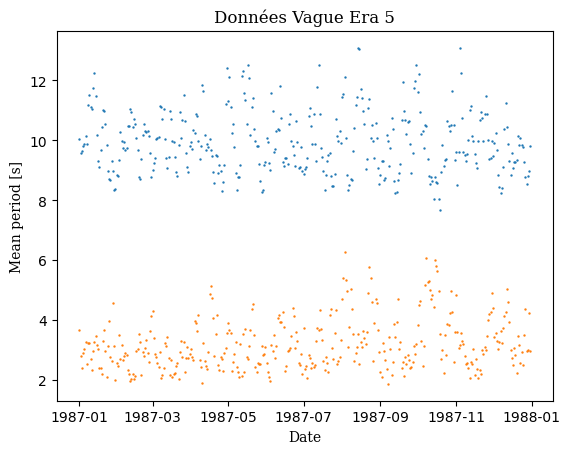

In [13]:
plt.scatter(calcul_energy_era5_1987['DateTime'], calcul_energy_era5_1987['mpts'], s=.5)
plt.scatter(calcul_energy_era5_1987['DateTime'], calcul_energy_era5_1987['mpww'], s=.5)
plt.title('Données Vague Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
plt.ylabel('Mean period [s]', fontfamily = 'serif')

Text(0, 0.5, 'Mean heigh[m]')

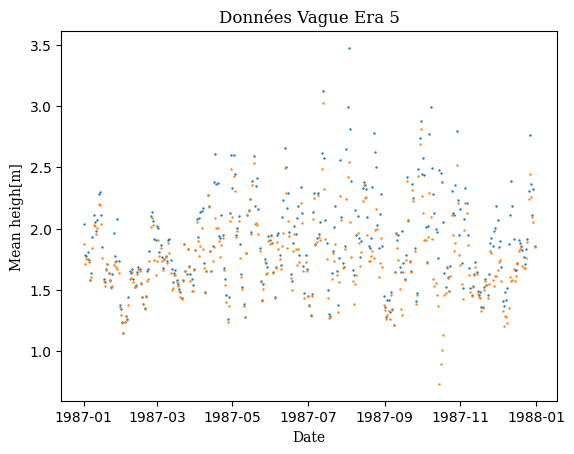

In [14]:
plt.scatter(calcul_energy_era5_1987['DateTime'], calcul_energy_era5_1987['swh'], s=.5)
plt.scatter(calcul_energy_era5_1987['DateTime'], calcul_energy_era5_1987['shts'], s=.5)
plt.title('Données Vague Era 5', fontfamily = 'serif')
plt.xlabel( 'Date', fontfamily = 'serif')
plt.ylabel('Mean heigh[m]', fontfamily = 'serif')

TOO MUCH INTEGRATED ENERGY

In [15]:
chemin_fichier_nc = 'era 5/wind 1987 u10.nc'

ds = xr.open_dataset(chemin_fichier_nc)
wind_1987 = ds.to_dataframe()
wind_1987 = wind_1987.reset_index()
wind_1987 = wind_1987[(wind_1987['latitude'] == -17)&(wind_1987['longitude'] == -150)]
wind_1987 = wind_1987.rename(columns={'time': 'DateTime'})
wind_1987 = wind_1987.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
wind_1987 = wind_1987[['DateTime', 'u10']]
wind_1987 = wind_1987.reset_index().drop(columns='index')
wind_1987

,DateTime,u10
0,1987-01-01,-5.840099
1,1987-01-02,-3.469686
2,1987-01-03,-1.349996
3,1987-01-04,2.616369
4,1987-01-05,2.350797
...,...,...
360,1987-12-27,6.158917
361,1987-12-28,-0.884186
362,1987-12-29,0.037242
363,1987-12-30,5.925178


In [16]:
calcul_energy_era5_1987 = pd.merge(calcul_energy_era5_1987, wind_1987, on = 'DateTime')
densite_eau = 997 #kg.m-3
densite_air = 1.204 #kg.m-3
g = 9.806 #m.s-2
coefficient_trainee= 0.01
calcul_energy_era5_1987['friction_velocity'] = np.square(coefficient_trainee*(calcul_energy_era5_1987['u10']**2))
calcul_energy_era5_1987['c_g_mpts'] = g*calcul_energy_era5_1987['mpts'] #vitesse de groupe avec periode mpts
calcul_energy_era5_1987['c_g_mpww'] = (1/(4*np.pi))*g*calcul_energy_era5_1987['mpww'] #vitesse de groupe avec periode mpww
calcul_energy_era5_1987['energy_swh'] = (1/16)*densite_eau*g*(calcul_energy_era5_1987['swh']**2)
calcul_energy_era5_1987['energy_shts'] = (1/16)*densite_eau*g*(calcul_energy_era5_1987['shts']**2)
calcul_energy_era5_1987['flux_swh_mpts_n']=(calcul_energy_era5_1987['energy_swh']*calcul_energy_era5_1987['c_g_mpts'])/(densite_air*(calcul_energy_era5_1987['friction_velocity']**3))
calcul_energy_era5_1987['flux_swh_mpww_n']=(calcul_energy_era5_1987['energy_swh']*calcul_energy_era5_1987['c_g_mpww'])/(densite_air*(calcul_energy_era5_1987['friction_velocity']**3))
calcul_energy_era5_1987['flux_shts_mpts_n']=(calcul_energy_era5_1987['energy_shts']*calcul_energy_era5_1987['c_g_mpts'])/(densite_air*(calcul_energy_era5_1987['friction_velocity']**3))
calcul_energy_era5_1987['flux_shts_mpww_n']=(calcul_energy_era5_1987['energy_shts']*calcul_energy_era5_1987['c_g_mpww'])/(densite_air*(calcul_energy_era5_1987['friction_velocity']**3))
#calcul_energy_era5_1987 = pd.merge(calcul_energy_era5_1987, energy_era5_day_1987, on = 'DateTime', how = 'inner')
calcul_energy_era5_1987

,DateTime,mpts,mpww,swh,shts,u10,friction_velocity,c_g_mpts,c_g_mpww,energy_swh,energy_shts,flux_swh_mpts_n,flux_swh_mpww_n,flux_shts_mpts_n,flux_shts_mpww_n
0,1987-01-01,10.049086,3.661537,2.039976,1.875391,-5.840099,1.163271e-01,98.541339,2.857232,2542.828454,2149.070259,1.322107e+08,3.833484e+06,1.117378e+08,3.239867e+06
1,1987-01-02,9.565148,2.797644,1.783836,1.711888,-3.469686,1.449308e-02,93.795838,2.183104,1944.361943,1790.678098,4.975681e+10,1.158093e+09,4.582399e+10,1.066556e+09
2,1987-01-03,9.660305,2.398048,1.772235,1.751275,-1.349996,3.321470e-04,94.728947,1.871285,1919.152647,1874.027025,4.120735e+15,8.140142e+13,4.023843e+15,7.948740e+13
3,1987-01-04,9.819112,2.898669,1.807879,1.753848,2.616369,4.685934e-03,96.286209,2.261938,1997.127027,1879.538295,1.552225e+12,3.646458e+10,1.460832e+12,3.431759e+10
4,1987-01-05,9.891099,3.051945,1.745497,1.730881,2.350797,3.053941e-03,96.992119,2.381545,1861.680758,1830.632861,5.265424e+12,1.292872e+11,5.177611e+12,1.271311e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1987-12-27,8.771692,4.383902,2.764729,2.448137,6.158917,1.438856e-01,86.015214,3.420920,4670.595333,3662.169649,1.120130e+08,4.454882e+06,8.782837e+07,3.493031e+06
361,1987-12-28,8.544616,2.965378,2.363348,2.260367,-0.884186,6.111863e-05,83.788507,2.313993,3412.890872,3121.943936,1.040302e+18,2.873011e+16,9.516173e+17,2.628088e+16
362,1987-12-29,8.799358,2.994975,2.110367,2.097023,0.037242,1.923741e-10,86.286504,2.337089,2721.340883,2687.036178,2.739424e+34,7.419789e+32,2.704891e+34,7.326257e+32
363,1987-12-30,8.963345,4.247687,2.319761,2.051855,5.925178,1.232553e-01,87.894558,3.314626,3288.163318,2572.529286,1.281954e+08,4.834426e+06,1.002950e+08,3.782264e+06


REAL ENERGY ?

In [17]:

chemin_fichier_nc = 'era 5/energy calcul 1987.nc'

ds = xr.open_dataset(chemin_fichier_nc)
new_energy_1987 = ds.to_dataframe()
new_energy_1987 = new_energy_1987.reset_index()
new_energy_19877 = new_energy_1987[(new_energy_1987['latitude'] == -17)&(new_energy_1987['longitude'] == -150)]
new_energy_1987 = new_energy_1987.rename(columns={'time': 'DateTime'})
new_energy_1987 = new_energy_1987.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
new_energy_1987 = new_energy_1987[['DateTime','mpts','mpww','swh','shts']]
new_energy_1987 = new_energy_1987.reset_index().drop(columns='index')

pw = 997 #kg.m-3
g = 9.806 #m.s-2
new_energy_1987['puissance calculée'] = (pw*(g**2)*new_energy_1987['mpts']*(new_energy_1987['shts']**2))/(64*np.pi)
new_energy_1987

,DateTime,mpts,mpww,swh,shts,puissance calculée
0,1987-01-01,10.104434,3.534867,2.012450,1.875144,16940.657812
1,1987-01-02,9.723404,2.778811,1.811315,1.745820,14130.782666
2,1987-01-03,9.710616,2.459514,1.795737,1.770587,14515.451935
3,1987-01-04,9.769772,2.668294,1.794564,1.752794,14311.840366
4,1987-01-05,9.897413,2.928638,1.695417,1.680706,13330.744460
...,...,...,...,...,...,...
360,1987-12-27,9.002557,4.249239,2.696211,2.360776,23923.486214
361,1987-12-28,8.955851,3.686658,2.452355,2.251824,21653.328321
362,1987-12-29,9.082655,3.641533,2.329178,2.115913,19389.103078
363,1987-12-30,9.303217,4.519262,2.401978,2.009356,17910.023135


In [ ]:
chemin_fichier_nc = 'era 5/w2 1987.nc'

ds = xr.open_dataset(chemin_fichier_nc)

wave_era5 = ds.to_dataframe()
wave_era5 = wave_era5.reset_index()
wave_era5 = wave_era5[(wave_era5['latitude'] == -17)&(wave_era5['longitude'] == -150)]
wave_era5 = wave_era5.rename(columns={'time': 'DateTime'})
wave_era5_day = wave_era5.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
wave_era5_day = wave_era5_day[['DateTime', 'mwp','swh']]
wave_era5_day_1987_2023 = wave_era5_day.reset_index().drop(columns='index')
for i in range(1988,2024) :
    chemin_fichier_nc = 'era 5/w2 '+str(i)+'.nc'

    ds = xr.open_dataset(chemin_fichier_nc)

    wave_era5 = ds.to_dataframe()
    wave_era5 = wave_era5.reset_index()
    wave_era5 = wave_era5[(wave_era5['latitude'] == -17)&(wave_era5['longitude'] == -150)]
    wave_era5 = wave_era5.rename(columns={'time': 'DateTime'})
    wave_era5_day = wave_era5.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
    wave_era5_day = wave_era5_day[['DateTime', 'mwp','swh']]
    wave_era5_day = wave_era5_day.reset_index().drop(columns='index')
    wave_era5_day_1987_2023 = pd.concat([wave_era5_day_1987_2023, wave_era5_day], axis = 0)
wave_era5_day_1987_2023 = wave_era5_day_1987_2023[['DateTime', 'mwp','swh']]
wave_era5_day_1987_2023 = wave_era5_day_1987_2023.reset_index().drop(columns='index')
wave_era5_day_1987_2023 #contient la période et la hauteur des vagues entre 1987 et 2023 d'après era5

In [ ]:
pw = 997 #kg.m-3
g = 9.806 #m.s-2
wave_era5_day_1987_2023['puissance'] = (pw*(g**2)*wave_era5_day_1987_2023['mwp']*(wave_era5_day_1987_2023['swh']**2))/(64*np.pi)

In [ ]:
wave_era5_day_1987_2023.to_csv('Tableaux finaux variables/fill_energy_houle.csv', index = False)

CHECK with in situ

In [23]:
hauteur = pd.read_csv('relevé houlographe/hauteur-significative-m.csv',sep= ';')
hauteur.columns

Index(['DateTime', 'm'], dtype='object')